## imports

In [1]:
%load_ext autoreload
%autoreload 2

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import seaborn as sns

from aqsone.data import get_data
from aqsone.trainer import Trainer

## Read dataset & explore

In [11]:
df = get_data(None) 

In [12]:
df.describe()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  object 
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 49.2+ MB


In [14]:
df_clean = df = df.drop(columns=['Product_Category_2', 'Product_Category_3'])

In [15]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     537577 non-null  object
 1   Product_ID                  537577 non-null  object
 2   Gender                      537577 non-null  object
 3   Age                         537577 non-null  object
 4   Occupation                  537577 non-null  int64 
 5   City_Category               537577 non-null  object
 6   Stay_In_Current_City_Years  537577 non-null  object
 7   Marital_Status              537577 non-null  int64 
 8   Product_Category_1          537577 non-null  int64 
 9   Purchase                    537577 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 41.0+ MB


In [16]:
df_clean.head(50) 

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,U0001,PRD069042,F,0-17,10,A,2,0,3,8370
1,U0001,PRD248942,F,0-17,10,A,2,0,1,15200
2,U0001,PRD087842,F,0-17,10,A,2,0,12,1422
3,U0001,PRD085442,F,0-17,10,A,2,0,12,1057
4,U0002,PRD285442,M,55+,16,C,4+,0,8,7969
5,U0003,PRD193542,M,26-35,15,A,3,0,1,15227
6,U0004,PRD184942,M,46-50,7,B,2,1,1,19215
7,U0004,PRD346142,M,46-50,7,B,2,1,1,15854
8,U0004,PRD97242,M,46-50,7,B,2,1,1,15686
9,U0005,PRD274942,M,26-35,20,A,1,1,8,7871


In [17]:
def show_counts(s):
    return pd.Series([x for l in s for x in l])

top_20_products = show_counts(df["Product_ID"]).value_counts().nlargest(20)
top_20_products

2    845149
4    709714
D    537577
P    537577
R    537577
1    368279
0    300868
3    228035
5    171862
8    156016
7    154524
9    147638
6    134013
dtype: int64

## who buys more per gender

In [20]:
params = df_clean.groupby(['Gender']).agg({'Purchase':['mean', 'std', 'count']})
params

Purchase                     
               mean          std   count
Gender                                  
F       8809.761349  4721.440055  132197
M       9504.771713  5051.057256  405380

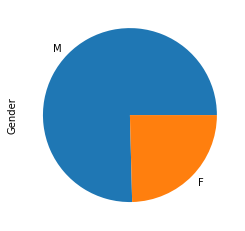

In [21]:
df_clean.Gender.value_counts(sort=False).plot.pie()
plt.show()

## Who buys more per age category

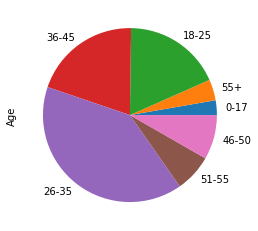

In [23]:
df_clean.Age.value_counts(sort=False).plot.pie()
plt.show()

## Buyers per location

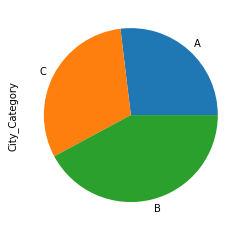

In [24]:
df_clean.City_Category.value_counts(sort=False).plot.pie()
plt.show()

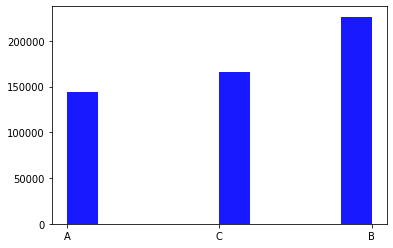

In [27]:
fig, ax = plt.subplots()
ax.hist(df_clean.City_Category, alpha=0.9, color='blue');

## Buyers per marital status

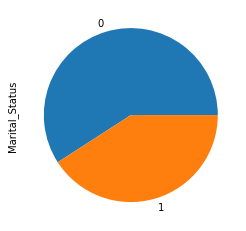

In [25]:
df_clean.Marital_Status.value_counts(sort=False).plot.pie()
plt.show()

## Structure of Purchase

<AxesSubplot:xlabel='City_Category', ylabel='Purchase'>

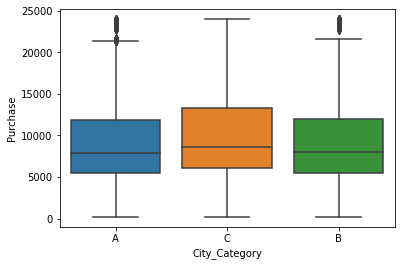

In [32]:
fig, ax = plt.subplots()
sns.boxplot(x="City_Category", y="Purchase", data=df_clean, ax=ax)
#ax.set_ylim([0, 500])

## Feature engineering

In [34]:
df_clean["City_A"] = np.where(df_clean.City_Category == 'A', 1, 0)
df_clean["City_B"] = np.where(df_clean.City_Category == 'B', 1, 0)

In [36]:
df_clean["Age_0_17"] = np.where(df_clean.Age == '0-17', 1, 0)
df_clean["Age_18_25"] = np.where(df_clean.Age == '18-25', 1, 0)
df_clean["Age_26_35"] = np.where(df_clean.Age == '25-35', 1, 0)
df_clean["Age_36_45"] = np.where(df_clean.Age == '36-45', 1, 0)

In [37]:
df_clean.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,City_A,City_B,Age_0_17,Age_18_25,Age_26_35,Age_36_45
0,U0001,PRD069042,F,0-17,10,A,2,0,3,8370,1,0,1,0,0,0
1,U0001,PRD248942,F,0-17,10,A,2,0,1,15200,1,0,1,0,0,0
2,U0001,PRD087842,F,0-17,10,A,2,0,12,1422,1,0,1,0,0,0
3,U0001,PRD085442,F,0-17,10,A,2,0,12,1057,1,0,1,0,0,0
4,U0002,PRD285442,M,55+,16,C,4+,0,8,7969,0,0,0,0,0,0
5,U0003,PRD193542,M,26-35,15,A,3,0,1,15227,1,0,0,0,0,0
6,U0004,PRD184942,M,46-50,7,B,2,1,1,19215,0,1,0,0,0,0
7,U0004,PRD346142,M,46-50,7,B,2,1,1,15854,0,1,0,0,0,0
8,U0004,PRD97242,M,46-50,7,B,2,1,1,15686,0,1,0,0,0,0
9,U0005,PRD274942,M,26-35,20,A,1,1,8,7871,1,0,0,0,0,0


In [39]:
df_clean.drop(columns=['Age', 'User_ID', 'Product_ID', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Product_Category_1'])

,Gender,Marital_Status,Purchase,City_A,City_B,Age_0_17,Age_18_25,Age_26_35,Age_36_45
0,F,0,8370,1,0,1,0,0,0
1,F,0,15200,1,0,1,0,0,0
2,F,0,1422,1,0,1,0,0,0
3,F,0,1057,1,0,1,0,0,0
4,M,0,7969,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
537572,M,0,11664,0,0,0,0,0,1
537573,M,0,19196,0,0,0,0,0,1
537574,M,0,8043,0,0,0,0,0,1
537575,M,0,7172,0,0,0,0,0,1


In [40]:
df_clean.Gender = np.where(df.Gender == 'F', 1, 0)

## Prediction purchase

In [41]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [42]:
X = df[['Gender', 'Marital_Status', 'City_A', 'City_B', 'Age_0_17',
       'Age_18_25', 'Age_26_35', 'Age_36_45']]

y = df['Purchase']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# R2 of test set using this model
print(r2_score(y_test, y_pred))

#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true))

print(mae(y_test, y_pred))

0.009289639591330334
4017.1114263240706
